In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder


**Load flowers dataset**


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='./0 resources/', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [12]:
import pathlib
data_dir=pathlib.Path("./0 resources/datasets/flower_photos")

In [13]:
data_dir

PosixPath('0 resources/datasets/flower_photos')

In [14]:
image_count=len(list(data_dir.glob("*/*.jpg")))   #gives all the images
image_count

3670

In [15]:
roses=list(data_dir.glob("./roses/*"))  #gets everything within the roses directory
roses[:5]

[PosixPath('0 resources/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

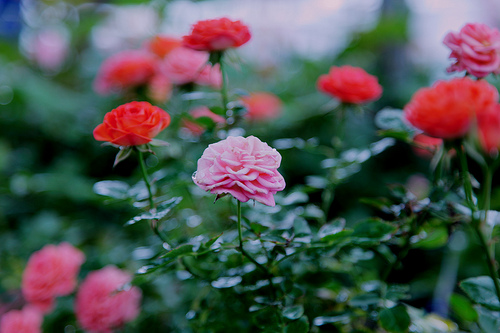

In [16]:
PIL.Image.open((roses[1]))

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [45]:
len(flowers_images_dict["tulips"])

799

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
flowers_images_dict['roses'][:3]

[PosixPath('0 resources/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('0 resources/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg')]

In [20]:
img=cv2.imread((str(flowers_images_dict["roses"][0])))
img.shape    # all images vary in Resolution so resizing them to 180x180

(243, 500, 3)

In [21]:
cv2.resize(img,(180,180)).shape   # ML model expects all the training sampels of the same dimension 

(180, 180, 3)

In [22]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])  # appends number for each of the flowers

In [23]:
y[:5]

[0, 0, 0, 0, 0]

In [24]:
# 3 dimensional array, 2 dims for X and y axis of the image and 3rd dimension for RGB channel as its a colorful img
X[0]

array([[[  2,   0,   2],
        [ 10,   5,   1],
        [ 89,  85,  97],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[ 14,  33,  73],
        [  6,   1,   2],
        [ 92,  90, 105],
        ...,
        [243, 244, 242],
        [244, 245, 243],
        [243, 244, 242]],

       [[122, 176, 224],
        [ 10,   1,   2],
        [ 72,  80,  84],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[147, 109,  85],
        [145, 109,  85],
        [144, 108,  84],
        ...,
        [155, 122,  96],
        [152, 121,  95],
        [149, 118,  93]],

       [[148, 114,  91],
        [154, 120,  96],
        [146, 112,  88],
        ...,
        [155, 125,  98],
        [153, 121,  95],
        [152, 122,  93]],

       [[153, 119,  96],
        [151, 117,  93],
        [152, 117,  94],
        ...,
        [154, 124,  97],
        [153, 121,  95],
        [153, 123,  94]]

In [25]:
#converting list into simple numpy array
X=np.array(X)
y=np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Pre-processing: Scale Images**

In [27]:
#divides each number by 255, so all the number comes in the range of 0-1, easily done in numpy
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [68]:
#on adding padding="same", then extra padding is added such that corner pixels are not neglected and 
#after the filteration it becomes of the same size(as it was before padding). 

model=Sequential([
    layers.Conv2D(filters=16,padding="same", kernel_size=(3,3),activation="relu", input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32,padding="same", kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,padding="same", kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Flatten(),     #converts 2d array to 1d array for classification
    layers.Dense(128, activation="relu"),
    layers.Dense(5,activation="sigmoid")
])

In [69]:
model.compile(optimizer="adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [70]:
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 42s 483ms/step - loss: 1.6631 - accuracy: 0.2409
Epoch 2/30
86/86 [==============================] - 41s 478ms/step - loss: 1.6606 - accuracy: 0.2442
Epoch 3/30
86/86 [==============================] - 41s 473ms/step - loss: 1.6606 - accuracy: 0.2442
Epoch 4/30
86/86 [==============================] - 41s 472ms/step - loss: 1.6606 - accuracy: 0.2442
Epoch 5/30
86/86 [==============================] - 41s 481ms/step - loss: 1.6606 - accuracy: 0.2442
Epoch 6/30
86/86 [==============================] - 566s 7s/step - loss: 1.6606 - accuracy: 0.2442
Epoch 7/30
86/86 [==============================] - 307s 4s/step - loss: 1.6606 - accuracy: 0.2442
Epoch 8/30
86/86 [==============================] - 50s 584ms/step - loss: 1.6606 - accuracy: 0.2442
Epoch 9/30
86/86 [==============================] - 58s 678ms/step - loss: 1.6606 - accuracy: 0.2442
Epoch 10/30
86/86 [==============================] - 45s 526ms/step - loss: 1.6606 - accuracy: 

In [71]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 121ms/step - loss: 1.6586 - accuracy: 0.2462


[1.6586098670959473, 0.24618735909461975]

In [72]:
predictions = model.predict_classes(X_test_scaled)

### Improve Test Accuracy Using Data Augmentation (reduces Overfitting )

In [73]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

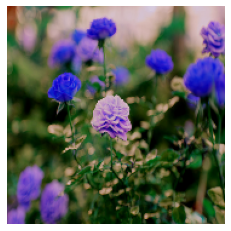

In [74]:
#Original Image
plt.axis('off')
plt.imshow(X[1])

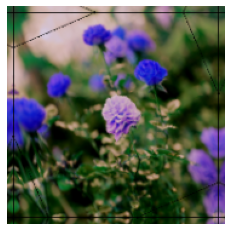

In [75]:
#Newly generated training sample using data augmentation

plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))

In [76]:
model = Sequential([
  data_augmentation,  # first layer
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),   # Drop out layer
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 52s 601ms/step - loss: 1.5540 - accuracy: 0.3325
Epoch 2/50
86/86 [==============================] - 54s 623ms/step - loss: 1.1274 - accuracy: 0.5345
Epoch 3/50
86/86 [==============================] - 52s 599ms/step - loss: 1.0077 - accuracy: 0.6097
Epoch 4/50
86/86 [==============================] - 52s 599ms/step - loss: 0.9335 - accuracy: 0.6453
Epoch 5/50
86/86 [==============================] - 51s 595ms/step - loss: 0.8605 - accuracy: 0.6635
Epoch 6/50
86/86 [==============================] - 51s 594ms/step - loss: 0.8197 - accuracy: 0.6791
Epoch 7/50
86/86 [==============================] - 51s 594ms/step - loss: 0.7683 - accuracy: 0.7031
Epoch 8/50
86/86 [==============================] - 619s 7s/step - loss: 0.7385 - accuracy: 0.7231
Epoch 9/50
86/86 [==============================] - 65s 752ms/step - loss: 0.7068 - accuracy: 0.7322
Epoch 10/50
86/86 [==============================] - 69s 802ms/step - loss: 0.6789 - accuracy

In [77]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 117ms/step - loss: 1.1422 - accuracy: 0.7407


[1.1421748399734497, 0.7407407164573669]